In [10]:
import librosa
import numpy as np
from antropy import spectral_entropy

def get_angle(filepath,angle_factor=1,sample_time=0.1):
    # Import the audio file
    x,sr=librosa.load(filepath)
    
    # Get the audio duration
    dur = librosa.get_duration(x,sr)
    
    # Split the data into ~100 ms samples
    sample_nb = int(dur/sample_time)+1
    list_x = []
    for i in range(sample_nb):
        list_x.append(x[i*len(x)//sample_nb:(i+1)*len(x)//sample_nb])
        
    # Compute entropy for every sample
    list_entropy = []
    for element in list_x:
        # Avoid division per 0 (if silence)
        if sum(np.abs(element))>1e-3:
            list_entropy.append(spectral_entropy(np.abs(element),sr))
        else:
            list_entropy.append(0)
            
    # Return a numpy array that contains all of the entropies 
    # multiply by a factor to get the angle for the robot
    return np.array(list_entropy)*angle_factor

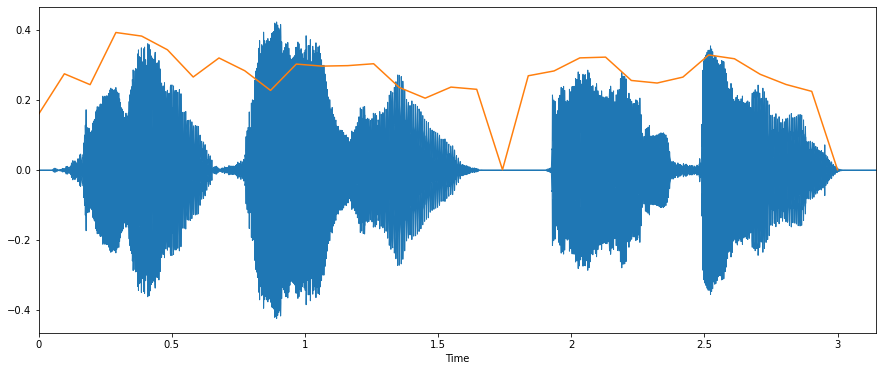

In [26]:
import matplotlib.pyplot as plt
from librosa import display

file = "l.wav"

x,sr=librosa.load(file)
list_angle = get_angle(file, 0.05)

plt.figure(figsize=(15,6))
display.waveplot(x,sr)
dur = int(librosa.get_duration(x,sr))

plt.plot(np.linspace(0,dur if dur>0 else 1 ,len(list_angle) ),list_angle)
plt.show()